# Telecom Churn - Group Case Study

## Problem Statement
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br>
## Main Goals:
- For many incumbent operators, retaining high profitable customers is the number one business goal. <br>
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

# 1. Loading dependencies & datasets
Lets start by loading our dependencies. We can keep adding any imports to this cell block, as we write mode and mode code.

In [1454]:
# Supressing the warnings first
import warnings
warnings.filterwarnings('ignore')

In [1455]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1456]:
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

In [1457]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [1458]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


### Next, we load our datasets and the data dictionary file.

### The train.csv file contains both dependent and independent features, while the test.csv contains only the independent variables.

### So, for model selection, I will create our own train/test dataset from the train.csv and use the model to predict ### the solution using the features in unseen test.csv data for submission.

In [1459]:
# Reading the data
df = pd.read_csv("C:\\Users\\91903\\Downloads\\telecom_churn_data\\train.csv\\train.csv")

In [1460]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [1461]:
# The shape code gives the no. of rows and columns
df.shape

(69999, 172)

In [1462]:
#To get an idea of the numeric values, use .describe()
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [1463]:
# The .info() code gives almost the entire information that needs to be inspected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [1464]:
import sweetviz as sv
sweet_report = sv.analyze(df,pairwise_analysis="off")
sweet_report.show_html('C:\\Users\\91903\\Downloads\\telecom_churn_data\\sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report C:\Users\91903\Downloads\telecom_churn_data\sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [1465]:
# Creating column name list by types of columns
id_cols = ['circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [1466]:
# The number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 1
#Date cols:9
#Numeric cols:156
#Category cols:6


In [1467]:
# checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == df.shape[1])

True


# Handling missing values

In [1468]:
# looking for missing values
(df.isnull().sum()*100/df.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
                              ...    
last_day_rch_amt_8           0.000000
vol_2g_mb_6                  0.000000
vol_2g_mb_7                  0.000000
vol_2g_mb_8                  0.000000
churn_probability            0.000000
Length: 172, dtype: float64

### Since there are approx 74-75% null values for average recharge amount, max recharge data and total recharge ### date and date of data recharge for mobile internet data is missing.

In [1469]:
# 1 is the min value for recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000
mean,2.467612,2.679989,2.652441,1.865323,2.056311,2.016018,0.602288,0.623678,0.636423,126.500000,126.402071,125.374925,192.831096,201.455940,196.815792
std,2.794610,3.073472,3.101265,2.566377,2.799916,2.728246,1.279297,1.401230,1.457058,109.352573,109.459266,109.648799,190.623115,198.346141,192.280532
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,84.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,42.000000,48.000000,44.000000,29.000000,34.000000,45.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


###  From above it is observed that there are 3 set of values for

### total recharge amount,
### maximum recharge amount and
### average recharge amount for data.
### total recharge for data
### maximum recharge for data

In [1470]:
# the customer didn't recharge because the recharge date and the recharge value are missing
  
df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
0,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN


In [1471]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = df['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = df['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = df['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(df.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(df.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(df.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = df['total_rech_data_6'] == np.nan 
is_invalid_data_7 = df['total_rech_data_7'] == np.nan 
is_invalid_data_8 = df['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(df.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(df.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(df.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


# Impute missing values

### We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.

In [1472]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
       ]

In [1473]:
# Now impute missing values with 0
df[zero_impute_rch] = df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [1474]:
print(df[zero_impute_rch].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [1475]:
#  unique values in each column
df.nunique().sort_values(ascending=False)

id                      69999
arpu_6                  61615
arpu_7                  61425
arpu_8                  60194
total_og_mou_7          33195
                        ...  
last_date_of_month_6        1
loc_ic_t2o_mou              1
std_og_t2o_mou              1
loc_og_t2o_mou              1
std_ic_t2o_mou_6            1
Length: 172, dtype: int64

In [1476]:
# Dropping the columns 
df = df.drop(id_cols + date_cols, axis=1)
df.shape

(69999, 162)

In [1477]:
# replace missing values with '-1' in categorical columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [1478]:
# Verifying the data
print("Missing value ratio:\n")
print(df[cat_cols].isnull().sum()*100/df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [1479]:
#Drop variables with more than a given threshold of missing values

initial_cols = df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(df.apply(lambda column: True if column.isnull().sum()/df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,id,True
1,loc_og_t2o_mou,True
2,std_og_t2o_mou,True
3,loc_ic_t2o_mou,True
4,arpu_6,True
...,...,...
157,aon,True
158,aug_vbc_3g,True
159,jul_vbc_3g,True
160,jun_vbc_3g,True


In [1480]:
# drop columns
df = df.loc[:, include_cols]

dropped_cols = df.shape[1] - initial_cols
print("{0} columns dropped.".format(dropped_cols))

-12 columns dropped.


In [1481]:
# imputing the respective null columns as 0. 
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [1482]:
# Filter high-value customers
# Observing recharge columns
rch_df=df.columns[df.columns.str.contains('rech_amt|rech_data')]
rch_df

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [1483]:
# null values in recharge columns
100*df.loc[:,rch_df].isnull().sum()/len(df)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [1484]:
df.loc[:,rch_df].describe()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,48.395787,51.415168,51.782975
std,404.211068,411.070120,426.181405,121.407701,120.782543,124.396750,1.762010,1.943193,1.973434,77.519536,78.069163,78.808337,126.923180,133.246541,131.291162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,100.000000,90.000000,30.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,229.000000,220.000000,225.000000,110.000000,110.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,438.000000,430.000000,436.000000,120.000000,128.000000,144.000000,1.000000,1.000000,1.000000,8.000000,14.000000,17.000000,8.000000,17.000000,23.000000
max,35190.000000,40335.000000,45320.000000,4010.000000,3299.000000,4449.000000,61.000000,54.000000,60.000000,1555.000000,1555.000000,1555.000000,5920.000000,4365.000000,4076.000000


In [1485]:
df.loc[:,rch_df].head(10)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
0,77.0,65.0,10.0,65.0,65.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,145.0,50.0,0.0,145.0,50.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0
2,70.0,120.0,0.0,70.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,160.0,240.0,130.0,110.0,110.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,290.0,136.0,122.0,50.0,41.0,30.0,7.0,7.0,6.0,25.0,41.0,25.0,175.0,191.0,142.0
5,100.0,90.0,100.0,30.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,130.0,0.0,130.0,110.0,0.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,198.0,198.0,198.0,198.0,198.0,198.0,1.0,1.0,1.0,198.0,198.0,198.0,198.0,198.0,198.0
8,200.0,0.0,150.0,200.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,128.0,160.0,279.0,128.0,110.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1486]:
# Investigation of values for june month only
rch_df_6=df.columns[df.columns.str.contains('rech_amt_6|rech_data_6|rech_amt_data_6')]
df.loc[:,rch_df_6].head(10)

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
0,77.0,65.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,70.0,70.0,0.0,0.0,0.0
3,160.0,110.0,0.0,0.0,0.0
4,290.0,50.0,7.0,25.0,175.0
5,100.0,30.0,0.0,0.0,0.0
6,130.0,110.0,0.0,0.0,0.0
7,198.0,198.0,1.0,198.0,198.0
8,200.0,200.0,0.0,0.0,0.0
9,128.0,128.0,0.0,0.0,0.0


In [1487]:
df.loc[:,rch_df_6].describe()

,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,av_rech_amt_data_6
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,328.139788,104.569265,0.619309,31.748339,48.395787
std,404.211068,121.407701,1.762010,77.519536,126.923180
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,30.000000,0.000000,0.000000,0.000000
50%,229.000000,110.000000,0.000000,0.000000,0.000000
75%,438.000000,120.000000,1.000000,8.000000,8.000000
max,35190.000000,4010.000000,61.000000,1555.000000,5920.000000


In [1488]:
# Verifying percentage of null values in recharge based columns
100*df.loc[:,rch_df].isnull().sum()/len(df)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

In [1489]:
# Get the index of null vals for both columns and verify if both matches 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


In [1490]:
#With the above test now we know that if total_rech_data is null then av_rech_amt_data is also null

In [1491]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [1492]:
any(df.total_rech_amt_6.isna())

False

In [1493]:
any(df.total_rech_amt_7.isna())

False

In [1494]:
# Total recharge amount for June and July 
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [1495]:
# average recharge done by customer in June and July
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [1496]:
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,0.0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,1.29,...,1958.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,65.0,71.0
1,1.0,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,0.00,...,710.0,0.0,0.0,0.0,0.0,0.0,145.0,0.0,290.0,145.0
2,2.0,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,0.00,...,882.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,120.0,95.0
3,3.0,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,0.00,...,982.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,240.0,200.0
4,4.0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,6.13,...,647.0,0.0,0.0,0.0,0.0,1225.0,1337.0,1515.0,1473.0,1494.0


In [1497]:
df[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,71.0,0.0,0.0,77.0,65.0
1,145.0,0.0,145.0,0.0,290.0
2,95.0,0.0,0.0,70.0,120.0
3,200.0,0.0,0.0,160.0,240.0
4,1494.0,1225.0,1337.0,1515.0,1473.0


## Filter high-value customers
### Define high-value customers as follows:

### Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [1498]:
# 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [1499]:
# Extracting High value customers where total average recharge amount for good phase > 70th percentile
high_val_cust = df.loc[df.av_amt_data_6_7 > df.av_amt_data_6_7.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(20998, 155)

In [1500]:
print("Number of rows before filtering the high value customers =", len(df))

Number of rows before filtering the high value customers = 69999


In [1501]:
print("Number of rows after filtering the high value customers =", len(high_val_cust))

Number of rows after filtering the high value customers = 20998


In [1502]:
# delete variables created to filter high-value customers
high_val_cust = high_val_cust.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_cust.shape

(20998, 150)

In [1503]:
high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20998 entries, 0 to 20997
Columns: 150 entries, id to churn_probability
dtypes: float64(150)
memory usage: 24.0 MB


###  Churn Derivation

In [1504]:
#  total incoming and outgoing minutes of usage
#high_val_cust['total_calls_mou_9'] = high_val_cust.total_ic_mou_9 + high_val_cust.total_og_mou_94
high_val_cust['total_calls_mou_8'] = high_val_cust.total_ic_mou_8 + high_val_cust.total_og_mou_8


In [1505]:
#     2g and 3g data consumption
#high_val_cust['total_internet_mb_9'] =  high_val_cust.vol_2g_mb_9 + high_val_cust.vol_3g_mb_9
high_val_cust['total_internet_mb_8'] =  high_val_cust.vol_2g_mb_8 + high_val_cust.vol_3g_mb_8


In [1506]:
#Tag churners and remove attributes of the churn phase
#Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

#The attributes you need to use to tag churners are:
#total_ic_mou_8
#total_og_mou_8
#vol_2g_mb_8
#vol_3g_mb_8

In [1507]:
# Those who have not used either calls or internet in  August are churned customers

# Let's denote 0 as not churn and  1 as churn
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [1508]:
# verify that the churn is tagged correctly

In [1509]:
high_val_cust[['churn','total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']]

,churn,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8
0,0,28.31,15.76,213.47,0.00
1,0,629.94,391.53,354.35,0.00
2,0,203.29,387.81,0.00,0.00
3,0,192.94,251.89,0.00,0.00
4,0,350.86,195.51,10.54,1342.93
...,...,...,...,...,...
20993,0,318.86,915.38,0.00,0.00
20994,0,63.98,36.76,14.15,154.55
20995,0,7.55,0.00,0.00,0.00
20996,0,269.56,392.58,144.31,0.00


In [1510]:
#After defining the y variable by tagging churners delete the columns having _8 attribute in their name
#After tagging churners, remove all the attributes corresponding to the churn phase
#(all attributes having ‘ _8’, etc. in their names).
#Get the list of columns which has name ends with _8 attribute

In [1511]:
# find the columns which has name ends with _9 attribute
month_8_cols = high_val_cust.columns[high_val_cust.columns.str.endswith(pat = '_8')]
print("The columns names ends with _8 are given below...")
month_8_cols

The columns names ends with _8 are given below...


Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'night_pck_user_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'fb_user_8', 'total_calls_mou_8', 'total_internet_mb_8'],
      dtype='object')

In [1512]:
# so, deleting derived variables
high_val_cust = high_val_cust.drop(['total_calls_mou_8', 'total_internet_mb_8'], axis=1)

In [1513]:
# change data type to category
high_val_cust.churn = high_val_cust.churn.astype("category")

# print churn ratio
print("Churn Ratio:")
print(high_val_cust.churn.value_counts()*100/high_val_cust.shape[0])

Churn Ratio:
0    94.675683
1     5.324317
Name: churn, dtype: float64


### We see that approx. 7.1% of high value customers have churned

# Calculate difference between 8th and previous months
Let's derive some variables. The most important feature, in this situation, can be the difference between the 8th month and the previous months. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month.


In [1514]:
#calculate difference variable as the difference between 8th month and the average of 6th and 7th month.

In [1515]:
high_val_cust['arpu_diff'] = high_val_cust.arpu_8 - ((high_val_cust.arpu_6 + high_val_cust.arpu_7)/2)

high_val_cust['onnet_mou_diff'] = high_val_cust.onnet_mou_8 - ((high_val_cust.onnet_mou_6 + high_val_cust.onnet_mou_7)/2)

high_val_cust['offnet_mou_diff'] = high_val_cust.offnet_mou_8 - ((high_val_cust.offnet_mou_6 + high_val_cust.offnet_mou_7)/2)

high_val_cust['roam_ic_mou_diff'] = high_val_cust.roam_ic_mou_8 - ((high_val_cust.roam_ic_mou_6 + high_val_cust.roam_ic_mou_7)/2)

high_val_cust['roam_og_mou_diff'] = high_val_cust.roam_og_mou_8 - ((high_val_cust.roam_og_mou_6 + high_val_cust.roam_og_mou_7)/2)

high_val_cust['loc_og_mou_diff'] = high_val_cust.loc_og_mou_8 - ((high_val_cust.loc_og_mou_6 + high_val_cust.loc_og_mou_7)/2)

high_val_cust['std_og_mou_diff'] = high_val_cust.std_og_mou_8 - ((high_val_cust.std_og_mou_6 + high_val_cust.std_og_mou_7)/2)

high_val_cust['isd_og_mou_diff'] = high_val_cust.isd_og_mou_8 - ((high_val_cust.isd_og_mou_6 + high_val_cust.isd_og_mou_7)/2)

high_val_cust['spl_og_mou_diff'] = high_val_cust.spl_og_mou_8 - ((high_val_cust.spl_og_mou_6 + high_val_cust.spl_og_mou_7)/2)

high_val_cust['total_og_mou_diff'] = high_val_cust.total_og_mou_8 - ((high_val_cust.total_og_mou_6 + high_val_cust.total_og_mou_7)/2)

high_val_cust['loc_ic_mou_diff'] = high_val_cust.loc_ic_mou_8 - ((high_val_cust.loc_ic_mou_6 + high_val_cust.loc_ic_mou_7)/2)

high_val_cust['std_ic_mou_diff'] = high_val_cust.std_ic_mou_8 - ((high_val_cust.std_ic_mou_6 + high_val_cust.std_ic_mou_7)/2)

high_val_cust['isd_ic_mou_diff'] = high_val_cust.isd_ic_mou_8 - ((high_val_cust.isd_ic_mou_6 + high_val_cust.isd_ic_mou_7)/2)

high_val_cust['spl_ic_mou_diff'] = high_val_cust.spl_ic_mou_8 - ((high_val_cust.spl_ic_mou_6 + high_val_cust.spl_ic_mou_7)/2)

high_val_cust['total_ic_mou_diff'] = high_val_cust.total_ic_mou_8 - ((high_val_cust.total_ic_mou_6 + high_val_cust.total_ic_mou_7)/2)

high_val_cust['total_rech_num_diff'] = high_val_cust.total_rech_num_8 - ((high_val_cust.total_rech_num_6 + high_val_cust.total_rech_num_7)/2)

high_val_cust['total_rech_amt_diff'] = high_val_cust.total_rech_amt_8 - ((high_val_cust.total_rech_amt_6 + high_val_cust.total_rech_amt_7)/2)

high_val_cust['max_rech_amt_diff'] = high_val_cust.max_rech_amt_8 - ((high_val_cust.max_rech_amt_6 + high_val_cust.max_rech_amt_7)/2)

high_val_cust['total_rech_data_diff'] = high_val_cust.total_rech_data_8 - ((high_val_cust.total_rech_data_6 + high_val_cust.total_rech_data_7)/2)

high_val_cust['max_rech_data_diff'] = high_val_cust.max_rech_data_8 - ((high_val_cust.max_rech_data_6 + high_val_cust.max_rech_data_7)/2)

high_val_cust['av_rech_amt_data_diff'] = high_val_cust.av_rech_amt_data_8 - ((high_val_cust.av_rech_amt_data_6 + high_val_cust.av_rech_amt_data_7)/2)

high_val_cust['vol_2g_mb_diff'] = high_val_cust.vol_2g_mb_8 - ((high_val_cust.vol_2g_mb_6 + high_val_cust.vol_2g_mb_7)/2)

high_val_cust['vol_3g_mb_diff'] = high_val_cust.vol_3g_mb_8 - ((high_val_cust.vol_3g_mb_6 + high_val_cust.vol_3g_mb_7)/2)

In [1516]:
high_val_cust['total_og_mou_diff'].describe()


count    20998.000000
mean       -68.444057
std        502.331630
min      -7213.410000
25%       -169.222500
50%        -14.022500
75%         68.473750
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [1517]:

#  8th Month (churned month) Columns
col_8 =  high_val_cust.columns[high_val_cust.columns.str.contains('_8')]

## delete columns that belong to the churn month (8th month)

In [1518]:
#  all names ending with 8
col_8 = high_val_cust.filter(regex='8$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_8]
cat_cols.append('churn')
num_cols = [col for col in high_val_cust.columns if col not in cat_cols]

In [1519]:
# change column types
high_val_cust[num_cols] = high_val_cust[num_cols].apply(pd.to_numeric)
high_val_cust[cat_cols] = high_val_cust[cat_cols].apply(lambda column: column.astype("category"), axis=0)

## Visualise data

In [1520]:
#  plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

## Univariate EDA

count    69999.000000
mean       283.134365
std        334.213918
min      -2258.709000
25%         93.581000
50%        197.484000
75%        370.791000
max      27731.088000
Name: arpu_6, dtype: float64


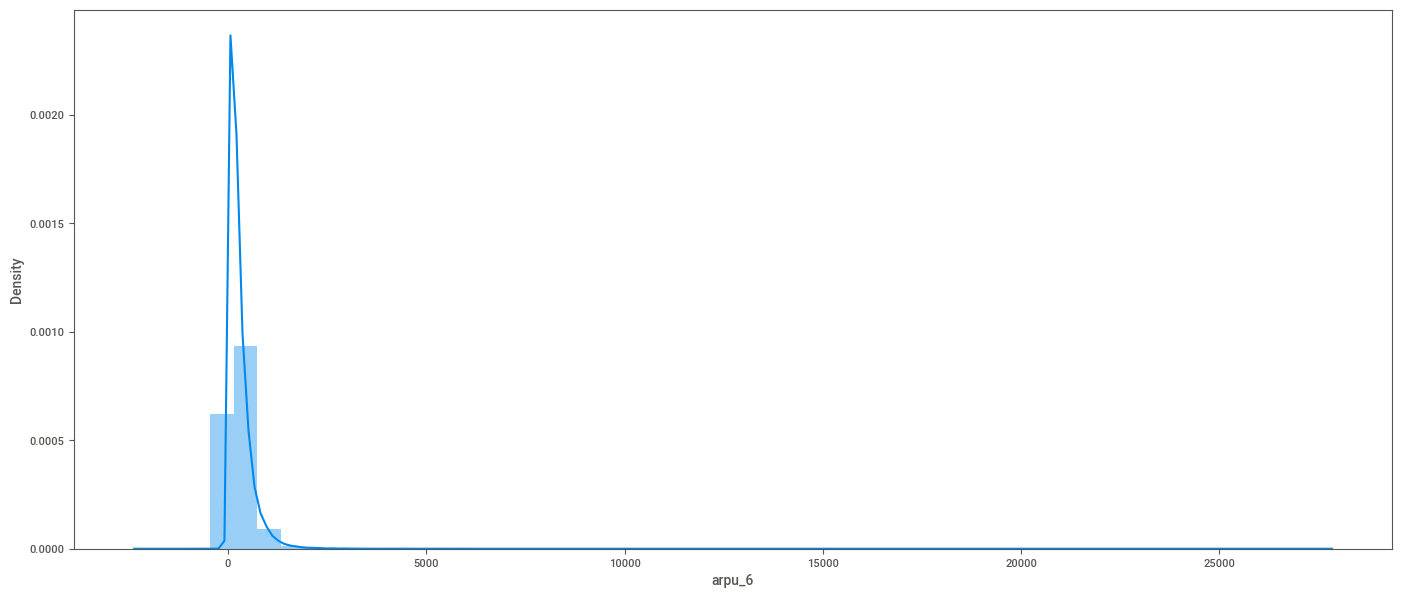

In [1521]:
univariate(df.arpu_6)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


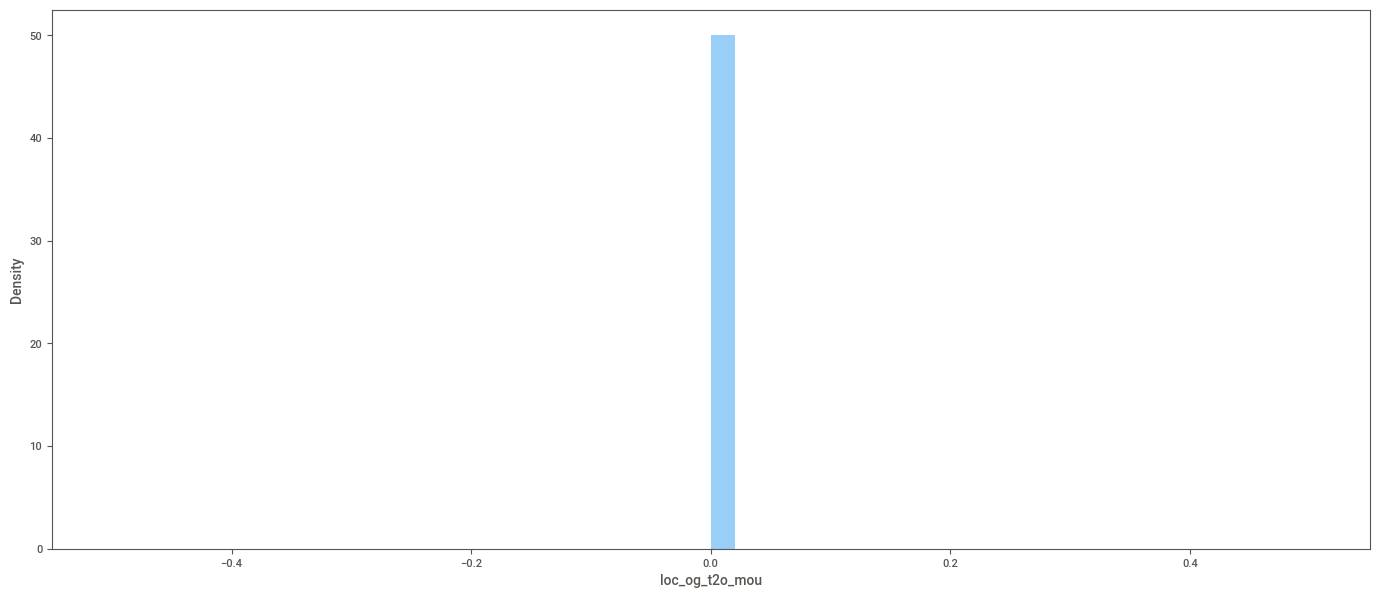

In [1522]:
univariate(df.loc_og_t2o_mou)

count    69999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


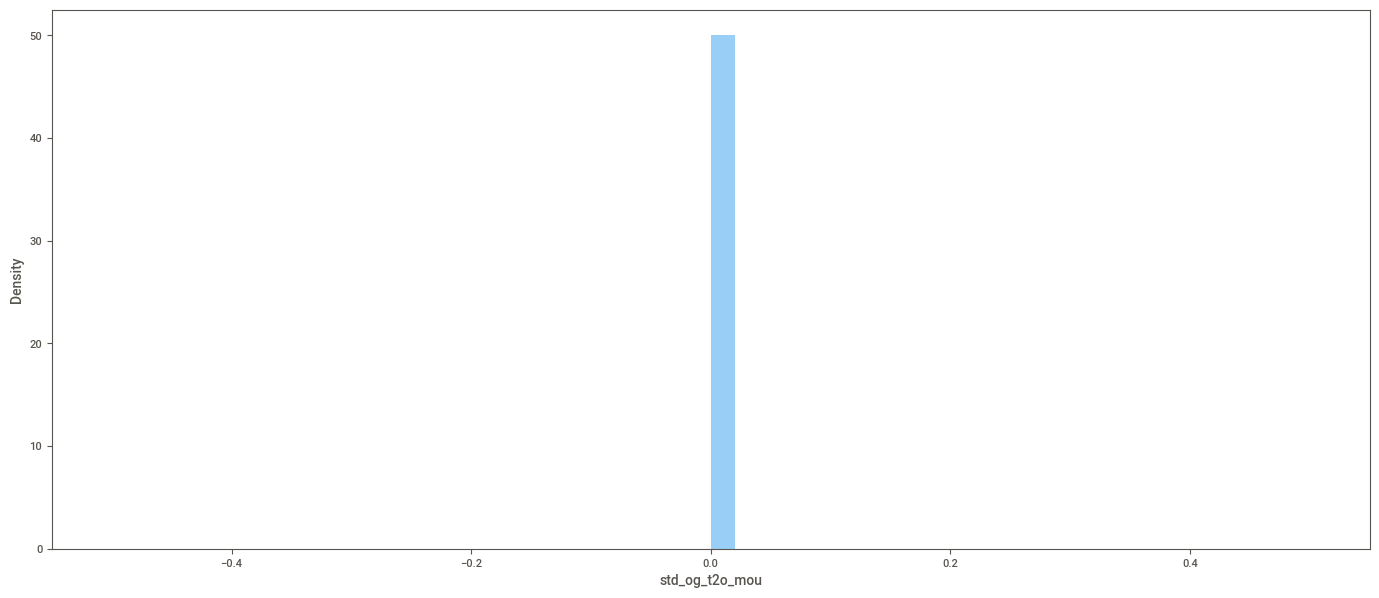

In [1523]:
univariate(df.std_og_t2o_mou)

## Bivariate EDA

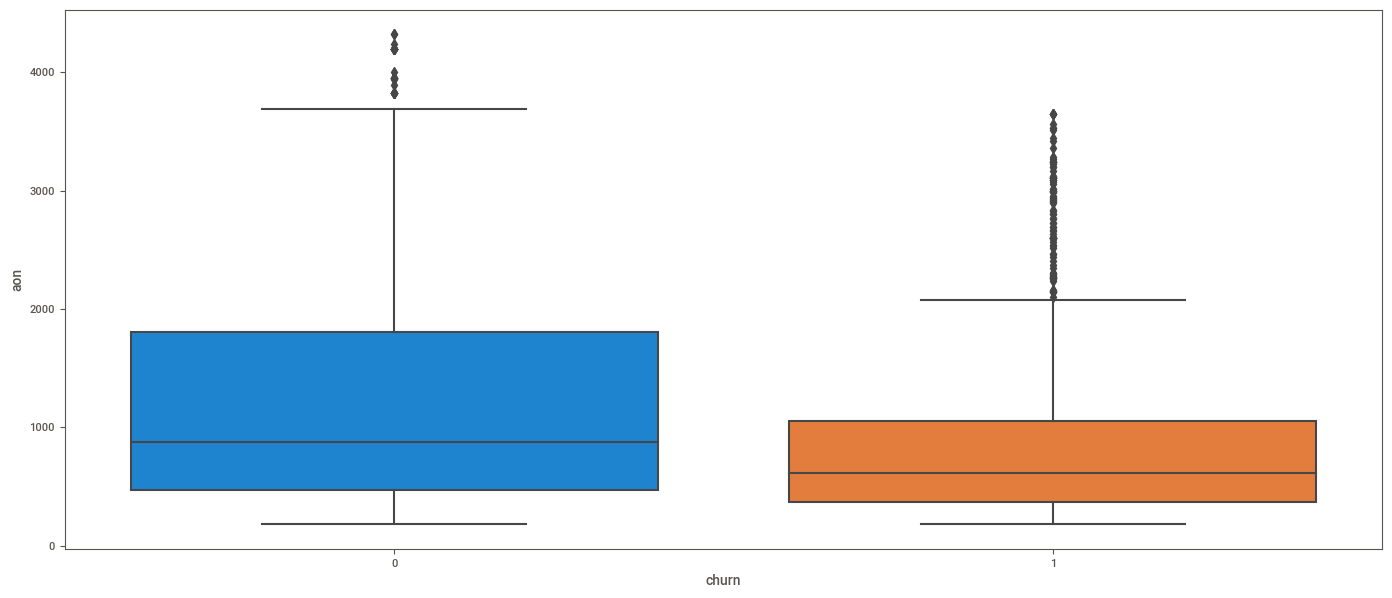

In [1524]:
bivariate(high_val_cust.churn, high_val_cust.aon)

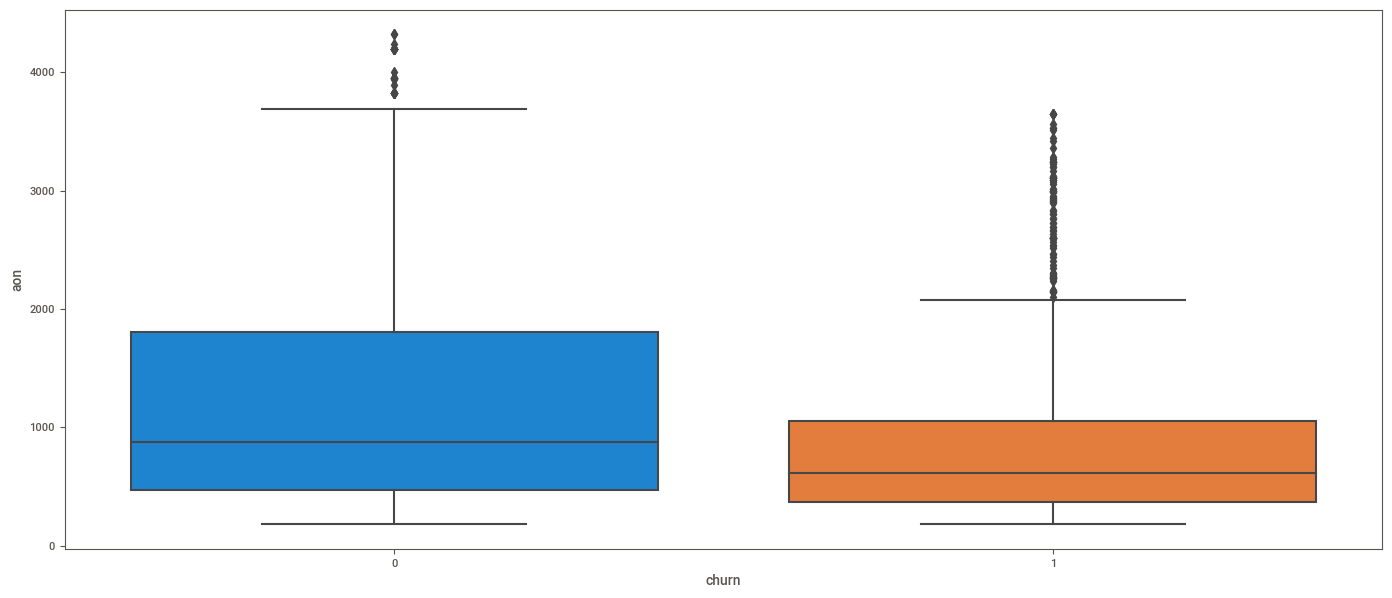

In [1525]:
bivariate(high_val_cust.churn, high_val_cust.aon)

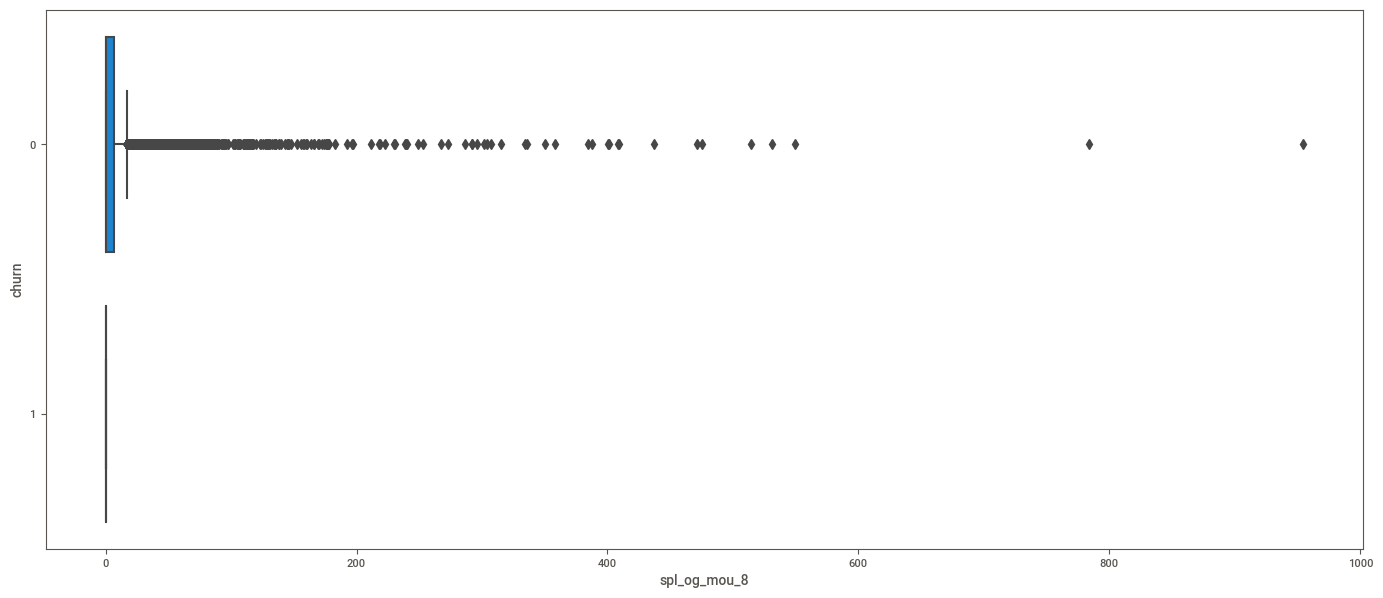

In [1526]:
bivariate(high_val_cust.spl_og_mou_8, high_val_cust.churn)

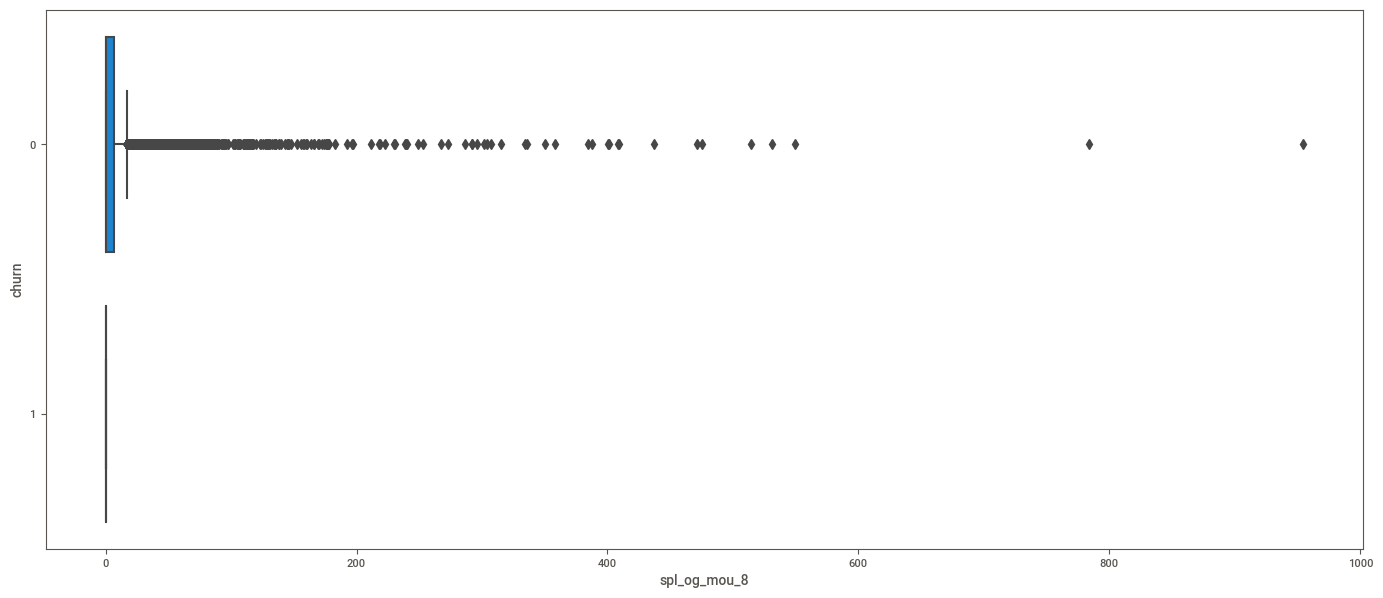

In [1527]:
bivariate(high_val_cust.spl_og_mou_8, high_val_cust.churn)


In [1528]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,88.892283,99.753109,100.0
1,11.107717,0.246891,0.0


In [1529]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,20.0,21.0,23.0,25.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,
0,18003,1177,282,138,69,62,29,24,22,14,...,3,1,3,2,2,1,1,1,1,1
1,1118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


count    69999.000000
mean       125.943607
std        304.990552
min          0.000000
25%          4.110000
50%         27.840000
75%        106.280000
max      10752.560000
Name: onnet_mou_8, dtype: float64


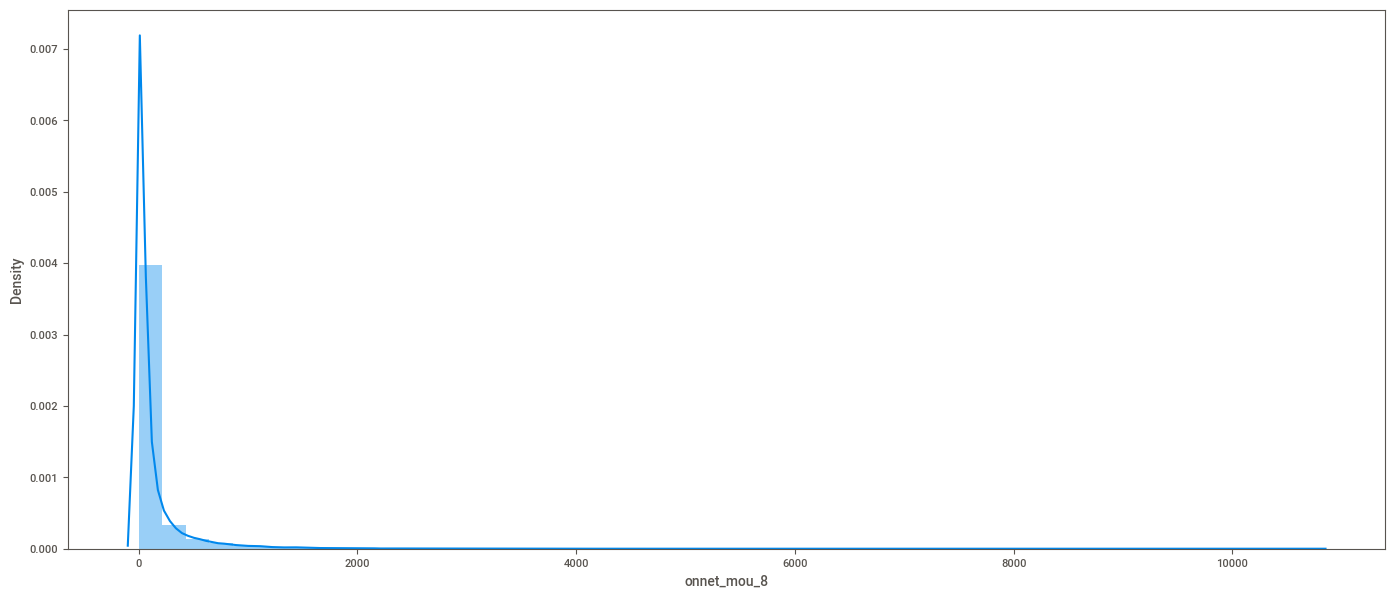

In [1530]:
univariate(df.onnet_mou_8)

In [1531]:
high_val_cust.columns

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       ...
       'spl_ic_mou_diff', 'total_ic_mou_diff', 'total_rech_num_diff',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'total_rech_data_diff',
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff'],
      dtype='object', length=174)

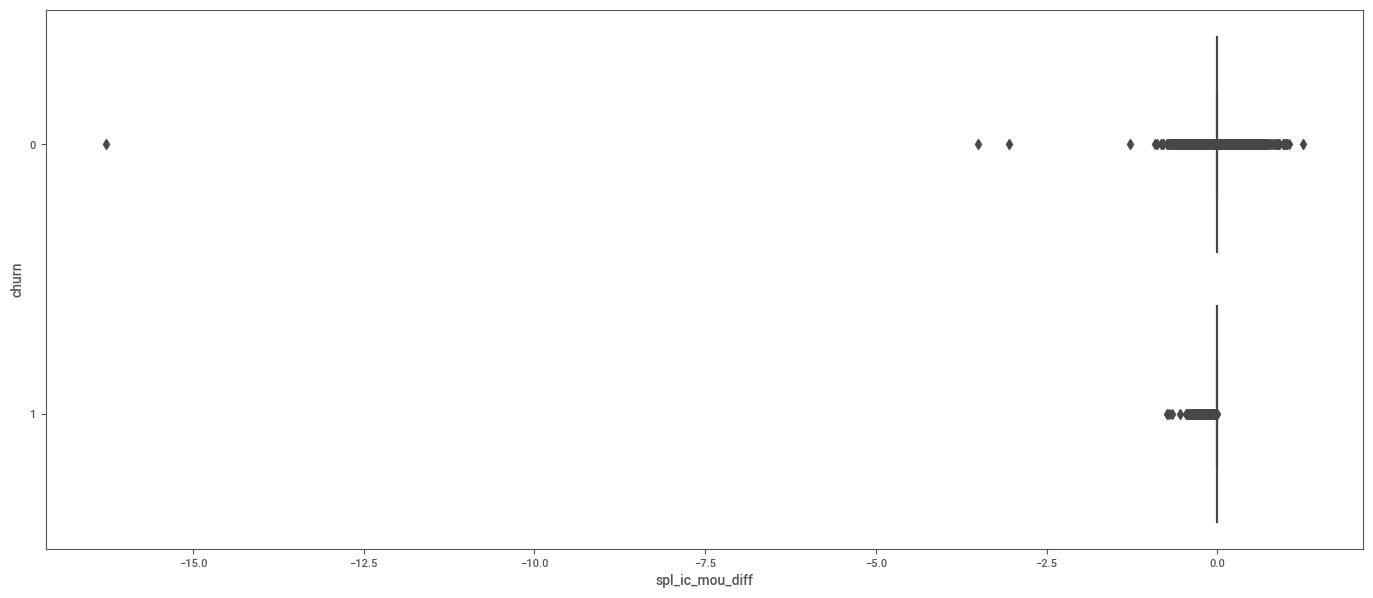

In [1532]:
bivariate(high_val_cust.spl_ic_mou_diff, high_val_cust.churn)

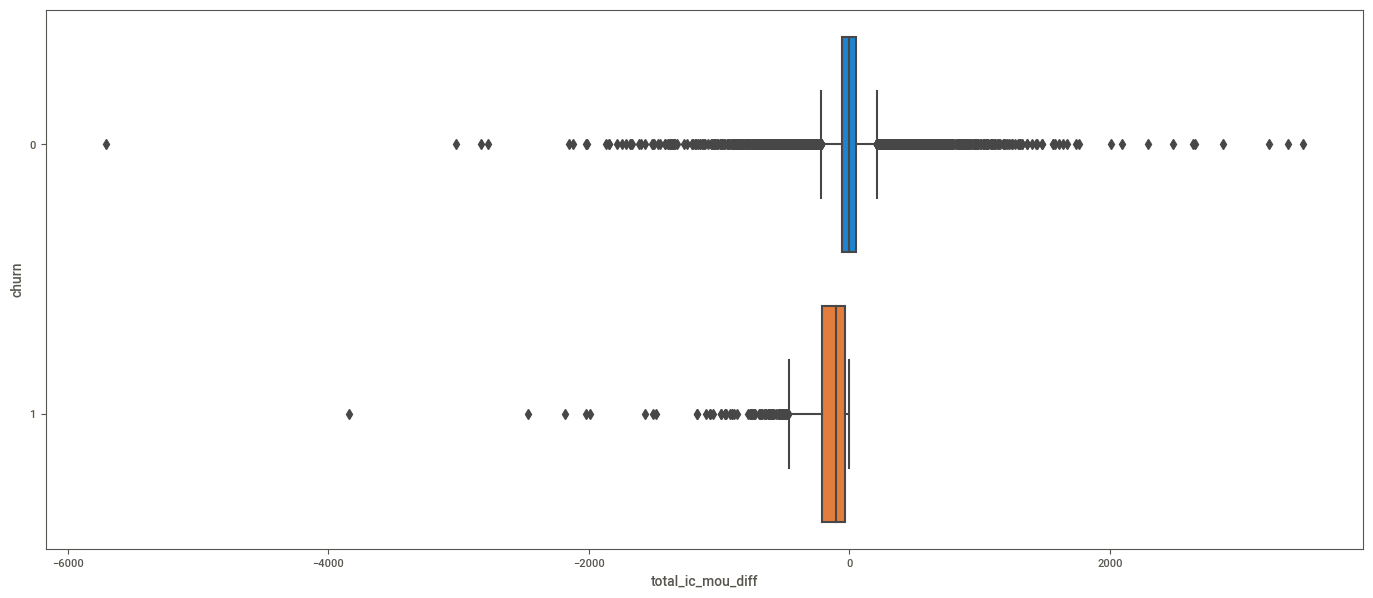

In [1533]:
bivariate(high_val_cust.total_ic_mou_diff, high_val_cust.churn)

In [1534]:
print('Summary metrics - Numeric Variables')

numeric_df = (high_val_cust.iloc[:,0:20])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,20:40])._get_numeric_data()
print(numeric_df.describe())
  
numeric_df = (high_val_cust.iloc[:,40:60])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,60:80])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,80:100])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,100:120])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,120:140])._get_numeric_data()
print(numeric_df.describe())

numeric_df = (high_val_cust.iloc[:,140:160])._get_numeric_data()
print(numeric_df.describe())

Summary metrics - Numeric Variables
                 id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count  20998.000000         20998.0         20998.0         20998.0   
mean   34996.153586             0.0             0.0             0.0   
std    20141.393373             0.0             0.0             0.0   
min        4.000000             0.0             0.0             0.0   
25%    17604.250000             0.0             0.0             0.0   
50%    34977.500000             0.0             0.0             0.0   
75%    52325.250000             0.0             0.0             0.0   
max    69997.000000             0.0             0.0             0.0   

             arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  20998.000000  20998.000000  20998.000000  20998.000000  20998.000000   
mean     558.615136    558.865269    506.960572    262.640469    268.004666   
std      474.255764    494.976335    520.084549    464.644996    486.246457   
min    -

## EDA - Summary
### Calls Revenue(3 columns):
 Invalid Values : Some minimum values are negative which indicates some customers are making loss to the company. These columns are either invalid or not adding value to our prediction . Therefore it can be dropped from the dataset.

Minutes of usage(60+ columns):
Usage minutes is generally 0 except for few outliers, for below variables:
Roaming Incoming ISD Incoming Special Incoming Others STD incoming T2F STD outgoing T2F Outgoing Others ISD Outgoing Local Outgoing T2C (Customer care calls)

Standardise: Revenue columns can be rounded to 2 decimal places.

Most of the columns have outliers.

### Aggregating Columns based on Incoming and Outgoing, or Aggregating based on Each Type of Incoming Calls and Outgoing Calls and looking at the metrics will give a better understanding of the data.

Recharge (12 Numeric + 3 Date columns)
Data Type Conversion:

Data in numeric columns are integers, so can be converted to int type.
Date columns need to be converted to date type
Data 2G And 3G(22 Columns)
#Most of the columns have median as O and have outliers

vbc_3g columns need column renaming as it needs month to be encoded to its number.

Standardise: Columns can be rounded off to 2 decimal places.

Age on Network (1 Column)
Feature can be derived from AON column.

Churn (Dependent Variable)
There exists a Class Imbalance in the dataset, where actual churn customers are only 6% of the dataset.

Reviewing the Dropped Columns:

More columns will be lost because of dropping missing value columns, while it can be handled to be imputed by considered 0 as missing values follow a pattern where Calls only users have blanks for Data related columns and the vice versa.

Feature Engineering - Thoughts
Derive no. of years the customer is using network from AON
Derive fields to indicate the type of user the customer is: Uses Both Calls and Data, Only Calls, Only Data, Only Incoming calls, Only Outgoing calls, etc.
Bind the customers into different segments based on Service usage, Recharge amount, Usage/Recharge pattern.
Calls to Customer Care is a Key indicator that customer is not happy with the services, derive columns like time over call

In [1535]:
# create function to anlyze the features across 6th, 7th and 8th month
def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [17, 7]
    fig = plt.figure()
    print("Churn Stats (mean and standard deviation):")
    cols = {c: feature_start + "_" + str(c) for c in [6,7,8]}
    print(cols)
    frame_data = []
    [frame_data.append({
        "mean_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].mean(),
        "mean_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].mean(),
        "mean_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].mean(),
        "std_6": high_val_cust[high_val_cust["churn"] == churn][cols[6]].std(),
        "std_7": high_val_cust[high_val_cust["churn"] == churn][cols[7]].std(),
        "std_8": high_val_cust[high_val_cust["churn"] == churn][cols[8]].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=3)
    sns.boxplot(data=high_val_cust, y=feature_start + "_6", x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[0])
    sns.boxplot(data=high_val_cust, y=feature_start + "_7",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[1])
    sns.boxplot(data=high_val_cust, y=feature_start + "_8",  x="churn",
                hue="churn", linewidth=2.5, showfliers=False, ax=axes[2])
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

Churn Stats (mean and standard deviation):
{6: 'total_rech_amt_6', 7: 'total_rech_amt_7', 8: 'total_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,651.53,666.42,610.80,560.33,591.68,632.32
Non Churned,846.45,497.83,82.79,768.32,552.08,436.87


<Figure size 1700x700 with 0 Axes>

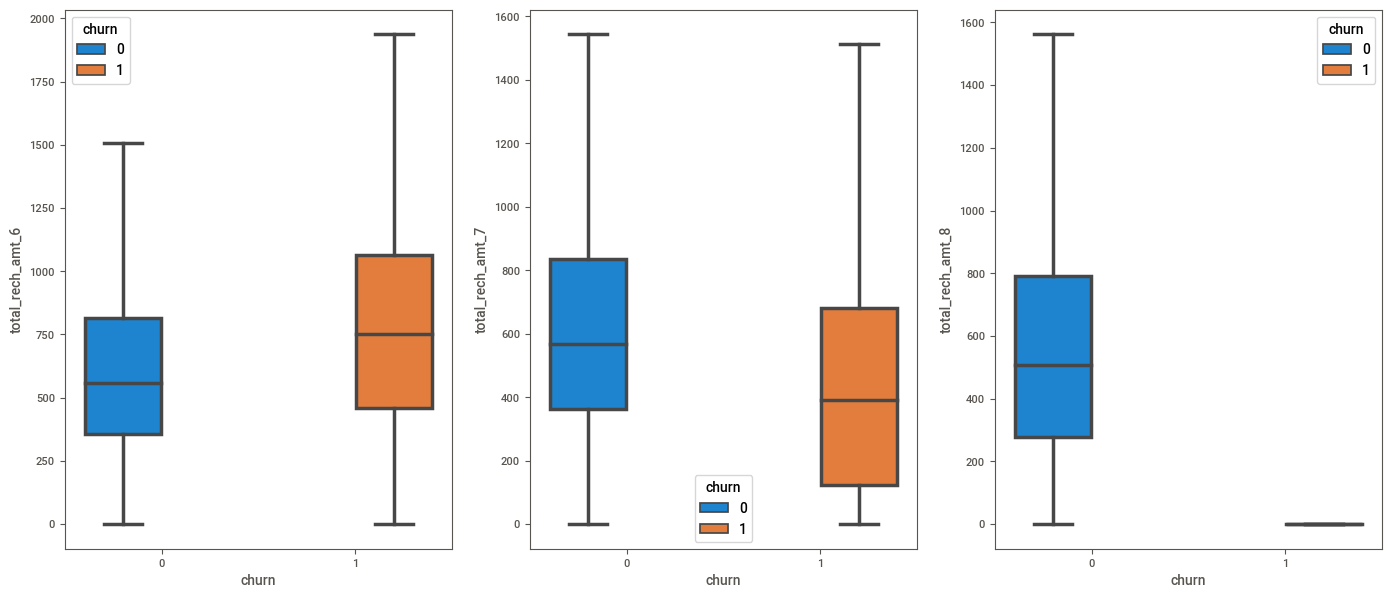

In [1536]:
analyze_feature('total_rech_amt')

In [1537]:
recharge_amnt_columns =  high_val_cust.columns[high_val_cust.columns.str.contains('rech_amt')]

recharge_amnt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'total_rech_amt_diff', 'max_rech_amt_diff', 'av_rech_amt_data_diff'],
      dtype='object')

Churn Stats (mean and standard deviation):
{6: 'max_rech_amt_6', 7: 'max_rech_amt_7', 8: 'max_rech_amt_8'}


,mean_6,mean_7,mean_8,std_6,std_7,std_8
Churned,168.26,171.88,166.55,174.47,169.89,166.59
Non Churned,181.47,147.75,30.96,220.12,229.18,129.13


<Figure size 1700x700 with 0 Axes>

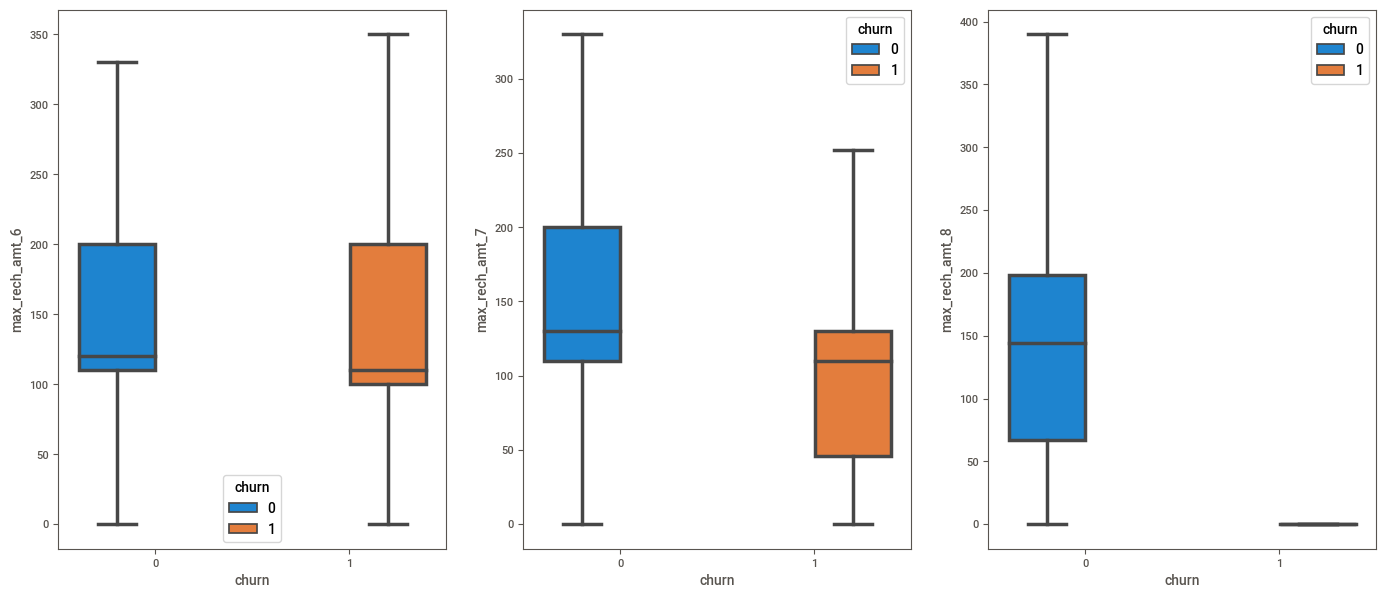

In [1538]:
# let's analyze total recharge amount for data:
analyze_feature('max_rech_amt')

In [1539]:
pd.crosstab(high_val_cust.churn, high_val_cust.night_pck_user_8, normalize='columns')*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,88.892283,99.753109,100.0
1,11.107717,0.246891,0.0


In [1540]:
pd.crosstab(high_val_cust.churn, high_val_cust.sachet_3g_8)

sachet_3g_8,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,18.0,19.0,20.0,21.0,23.0,25.0,29.0,30.0,38.0,41.0
churn,,,,,,,,,,,,,,,,,,,,,
0,18003,1177,282,138,69,62,29,24,22,14,...,3,1,3,2,2,1,1,1,1,1
1,1118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1541]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [1542]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", cap_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [1543]:
# cap outliers in the numeric columns
high_val_cust[num_cols] = high_val_cust[num_cols].apply(cap_outliers, axis=0)

In [1544]:
high_val_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,spl_ic_mou_diff,total_ic_mou_diff,total_rech_num_diff,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff
count,20998.000000,20998.0,20998.0,20998.0,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000
mean,34996.153586,0.0,0.0,0.0,548.521867,549.084833,496.804278,246.179636,250.887271,216.606257,...,-0.013312,-12.312539,-1.779466,-78.449904,-8.642859,-0.150685,-6.389746,-13.878529,-20.094439,-10.452269
std,20141.393373,0.0,0.0,0.0,357.956186,361.311079,383.937128,375.672618,388.793661,356.148812,...,0.117913,169.836624,5.796232,360.185361,99.297695,1.798913,67.628576,126.601421,188.267771,458.637983
min,4.000000,0.0,0.0,0.0,-864.152156,-926.063736,-945.808000,0.000000,0.000000,0.000000,...,-0.530844,-666.375630,-21.643538,-1334.065375,-408.360202,-6.705030,-239.938156,-457.709515,-792.050931,-1911.324271
1%,727.880000,0.0,0.0,0.0,0.808200,0.563700,0.000000,0.000000,0.000000,0.000000,...,-0.380000,-666.375630,-21.643538,-1186.015000,-408.360202,-6.500000,-239.938156,-449.000000,-792.050931,-1719.474150
10%,7132.400000,0.0,0.0,0.0,171.340600,175.818000,83.871700,0.674000,0.560000,0.000000,...,-0.130000,-172.457000,-8.000000,-509.000000,-106.500000,-2.000000,-87.500000,-152.000000,-167.651000,-388.387000
25%,17604.250000,0.0,0.0,0.0,307.751500,308.674000,230.395250,16.992500,15.810000,10.290000,...,0.000000,-65.946250,-4.500000,-245.000000,-33.000000,-0.500000,-7.000000,-61.000000,-21.158750,-1.743750
50%,34977.500000,0.0,0.0,0.0,482.797500,479.758000,427.580500,84.830000,82.210000,65.335000,...,0.000000,-5.192500,-1.500000,-57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52325.250000,0.0,0.0,0.0,700.751750,697.123250,658.771250,289.390000,288.717500,238.177500,...,0.000000,44.287500,1.000000,99.000000,25.000000,0.000000,0.000000,8.500000,0.000000,0.000000
90%,62914.300000,0.0,0.0,0.0,997.045000,990.293600,970.500800,761.387000,786.080000,664.296000,...,0.000000,141.190500,4.500000,299.000000,71.000000,1.500000,50.000000,112.500000,67.470500,308.260000


# Modelling

In [1545]:
#building the model now

# got numeric from
high_val_cust['churn'] = pd.to_numeric(high_val_cust['churn'])

In [1546]:
X = high_val_cust.drop("churn", axis = 1)
y = high_val_cust.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [1547]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn.mean()
train.groupby('night_pck_user_7').churn.mean()
train.groupby('night_pck_user_8').churn.mean()
train.groupby('fb_user_6').churn.mean()
train.groupby('fb_user_7').churn.mean()
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.110778
 0.0    0.028281
 1.0    0.000000
Name: churn, dtype: float64

In [1548]:
y_test.shape

(5250,)

In [1549]:
 y_train.shape

(15748,)

In [1550]:
X_train.shape

(15748, 173)

In [1551]:
X_test.shape

(5250, 173)

In [1552]:
# replace categories with aggregated values
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [1553]:
#datatypes 
X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15748 entries, 11293 to 13953
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  15748 non-null  category
 1   night_pck_user_7  15748 non-null  category
 2   fb_user_6         15748 non-null  category
 3   fb_user_7         15748 non-null  category
dtypes: category(4)
memory usage: 185.1 KB


# PCA

In [1554]:
(high_val_cust.isnull().sum()*100/high_val_cust.shape[0]).sort_values(ascending=False)

id                    0.0
av_rech_amt_data_7    0.0
last_day_rch_amt_8    0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
                     ... 
total_og_mou_7        0.0
total_og_mou_8        0.0
loc_ic_t2t_mou_6      0.0
loc_ic_t2t_mou_7      0.0
vol_3g_mb_diff        0.0
Length: 174, dtype: float64

In [1555]:
# apply pca to train data
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [1556]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [1557]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.42
1       20.81
2       26.66
3       31.58
4       35.58
        ...  
168    100.00
169    100.00
170    100.00
171    100.00
172    100.00
Length: 173, dtype: float64


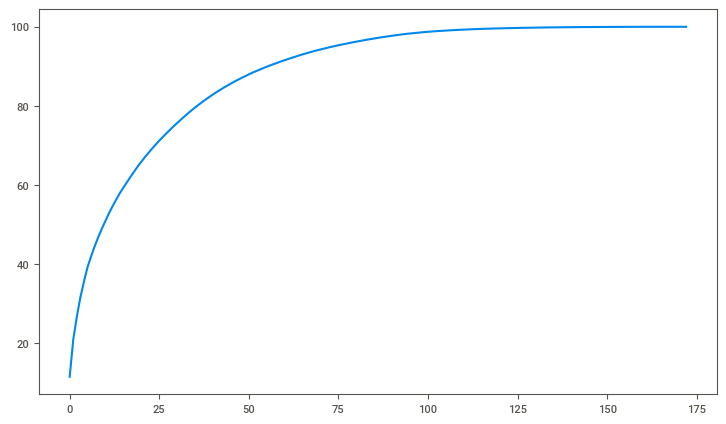

In [1558]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [1559]:
# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),("pca", PCA(n_components=PCA_VARS)),("logistic", LogisticRegression(class_weight='balanced'))]
pipeline = Pipeline(steps)

In [1560]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.9751714503429006

In [1561]:
# predicting churn on test data
y_pred = pipeline.predict(X_test)

# creating confusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4827  143]
 [   2  278]]
Sensitivity: 	0.99
Specificity: 	0.97
AUC:    	 1.0


# Hyperparameter tuning

In [1562]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

In [1563]:
steps = [("scaler", StandardScaler()),("pca", PCA()),("logistic", logistic)]

In [1564]:
# Compiling them
pca_logistic = Pipeline(steps)

In [1565]:
param = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.4, 0.5], 'logistic__penalty': ['l1', 'l2']}

In [1566]:
# 5Folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [1567]:
# Model
model = GridSearchCV(estimator = pca_logistic, cv = fold, param_grid = param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1568]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.4, 0.5],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [1569]:
# cross validation
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.337346,0.691434,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,3.650864,0.912003,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,5.827519,1.131990,0.134333,0.055447,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993361,0.993996,0.995086,0.994934,0.995303,0.994536,0.000738,6
3,4.695299,1.680409,0.174842,0.088874,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.993445,0.994401,0.995375,0.995161,0.995683,0.994813,0.000804,5
4,2.616199,1.185921,0.000000,0.000000,0.4,l1,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,3.045769,1.486711,0.000000,0.000000,0.4,l1,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
6,3.294372,1.117943,0.057784,0.005732,0.4,l2,60,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994531,0.994611,0.995287,0.995584,0.995781,0.995159,0.000506,3
7,5.206840,1.959898,0.103803,0.059958,0.4,l2,80,"{'logistic__C': 0.4, 'logistic__penalty': 'l2'...",0.994577,0.994648,0.995686,0.995675,0.996024,0.995322,0.000593,2
8,3.067621,1.463567,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,2.266059,0.946638,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12


In [1570]:
# best hyperparameters score
model.best_score_

0.9953487534846948

In [1571]:
# best hyperparameters
model.best_params_

{'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 80}

In [1572]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),3))

[[4838  132]
 [   4  276]]
Sensitivity: 	0.99
Specificity: 	0.97
AUC:    	 0.996


# Using random forest

In [1573]:
frt = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

In [1574]:
param = {"criterion": ['gini', 'entropy'], "max_features": [1]}

In [1575]:
# creating folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)

In [1576]:
# Grid search
model = GridSearchCV(estimator=frt, cv=fold, param_grid=param, scoring='roc_auc', n_jobs=-1, verbose=1)

In [1577]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=20, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [1]},
             scoring='roc_auc', verbose=1)

In [1578]:
# best hyperparameters score
model.best_score_

0.9997802409457218

In [1579]:
# best hyperparameters
model.best_params_

{'criterion': 'gini', 'max_features': 1}

In [1580]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4967    3]
 [   8  272]]
Sensitivity: 	0.97
Specificity: 	1.0
AUC:    	 1.0


Looks like random forest is overfitting and the sensitivity is very low. So going with logistic and PCA

In [1581]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))
rand_frt_model = RandomForestClassifier(n_estimators=100, max_features = max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=20, verbose=1)

In [1582]:
# fiting the model
rand_frt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=20, verbose=1)

In [1583]:
# checking OOB score
rand_frt_model.oob_score_

0.9996824993649988

In [1584]:
# predicting churn on test data
y_pred = rand_frt_model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = rand_frt_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4970    0]
 [   0  280]]
Sensitivity: 	1.0
Specificity: 	1.0
ROC:    	 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1585]:
# predictors
feature = high_val_cust.drop('churn', axis=1).columns

In [1586]:
# feature_importance
importance = rand_frt_model.feature_importances_

In [1587]:
# creating the dataframe
feature_imp = pd.DataFrame({'variables': feature, 'importance_percentage': importance*100})
feature_imp = feature_imp[['variables', 'importance_percentage']]

In [1588]:
# sorting the features
feature_imp = feature_imp.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_imp.importance_percentage.sum())
feature_imp

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,loc_ic_mou_8,16.714893
1,loc_ic_t2m_mou_8,12.711151
2,total_og_mou_8,9.211734
3,total_ic_mou_8,8.996431
4,loc_og_mou_8,6.247925
...,...,...
168,loc_og_t2o_mou,0.000000
169,std_ic_t2o_mou_6,0.000000
170,loc_ic_t2o_mou,0.000000
171,std_og_t2o_mou,0.000000


In [1589]:
# extract top 'n' features
top_features = feature_imp.variables[0:50]

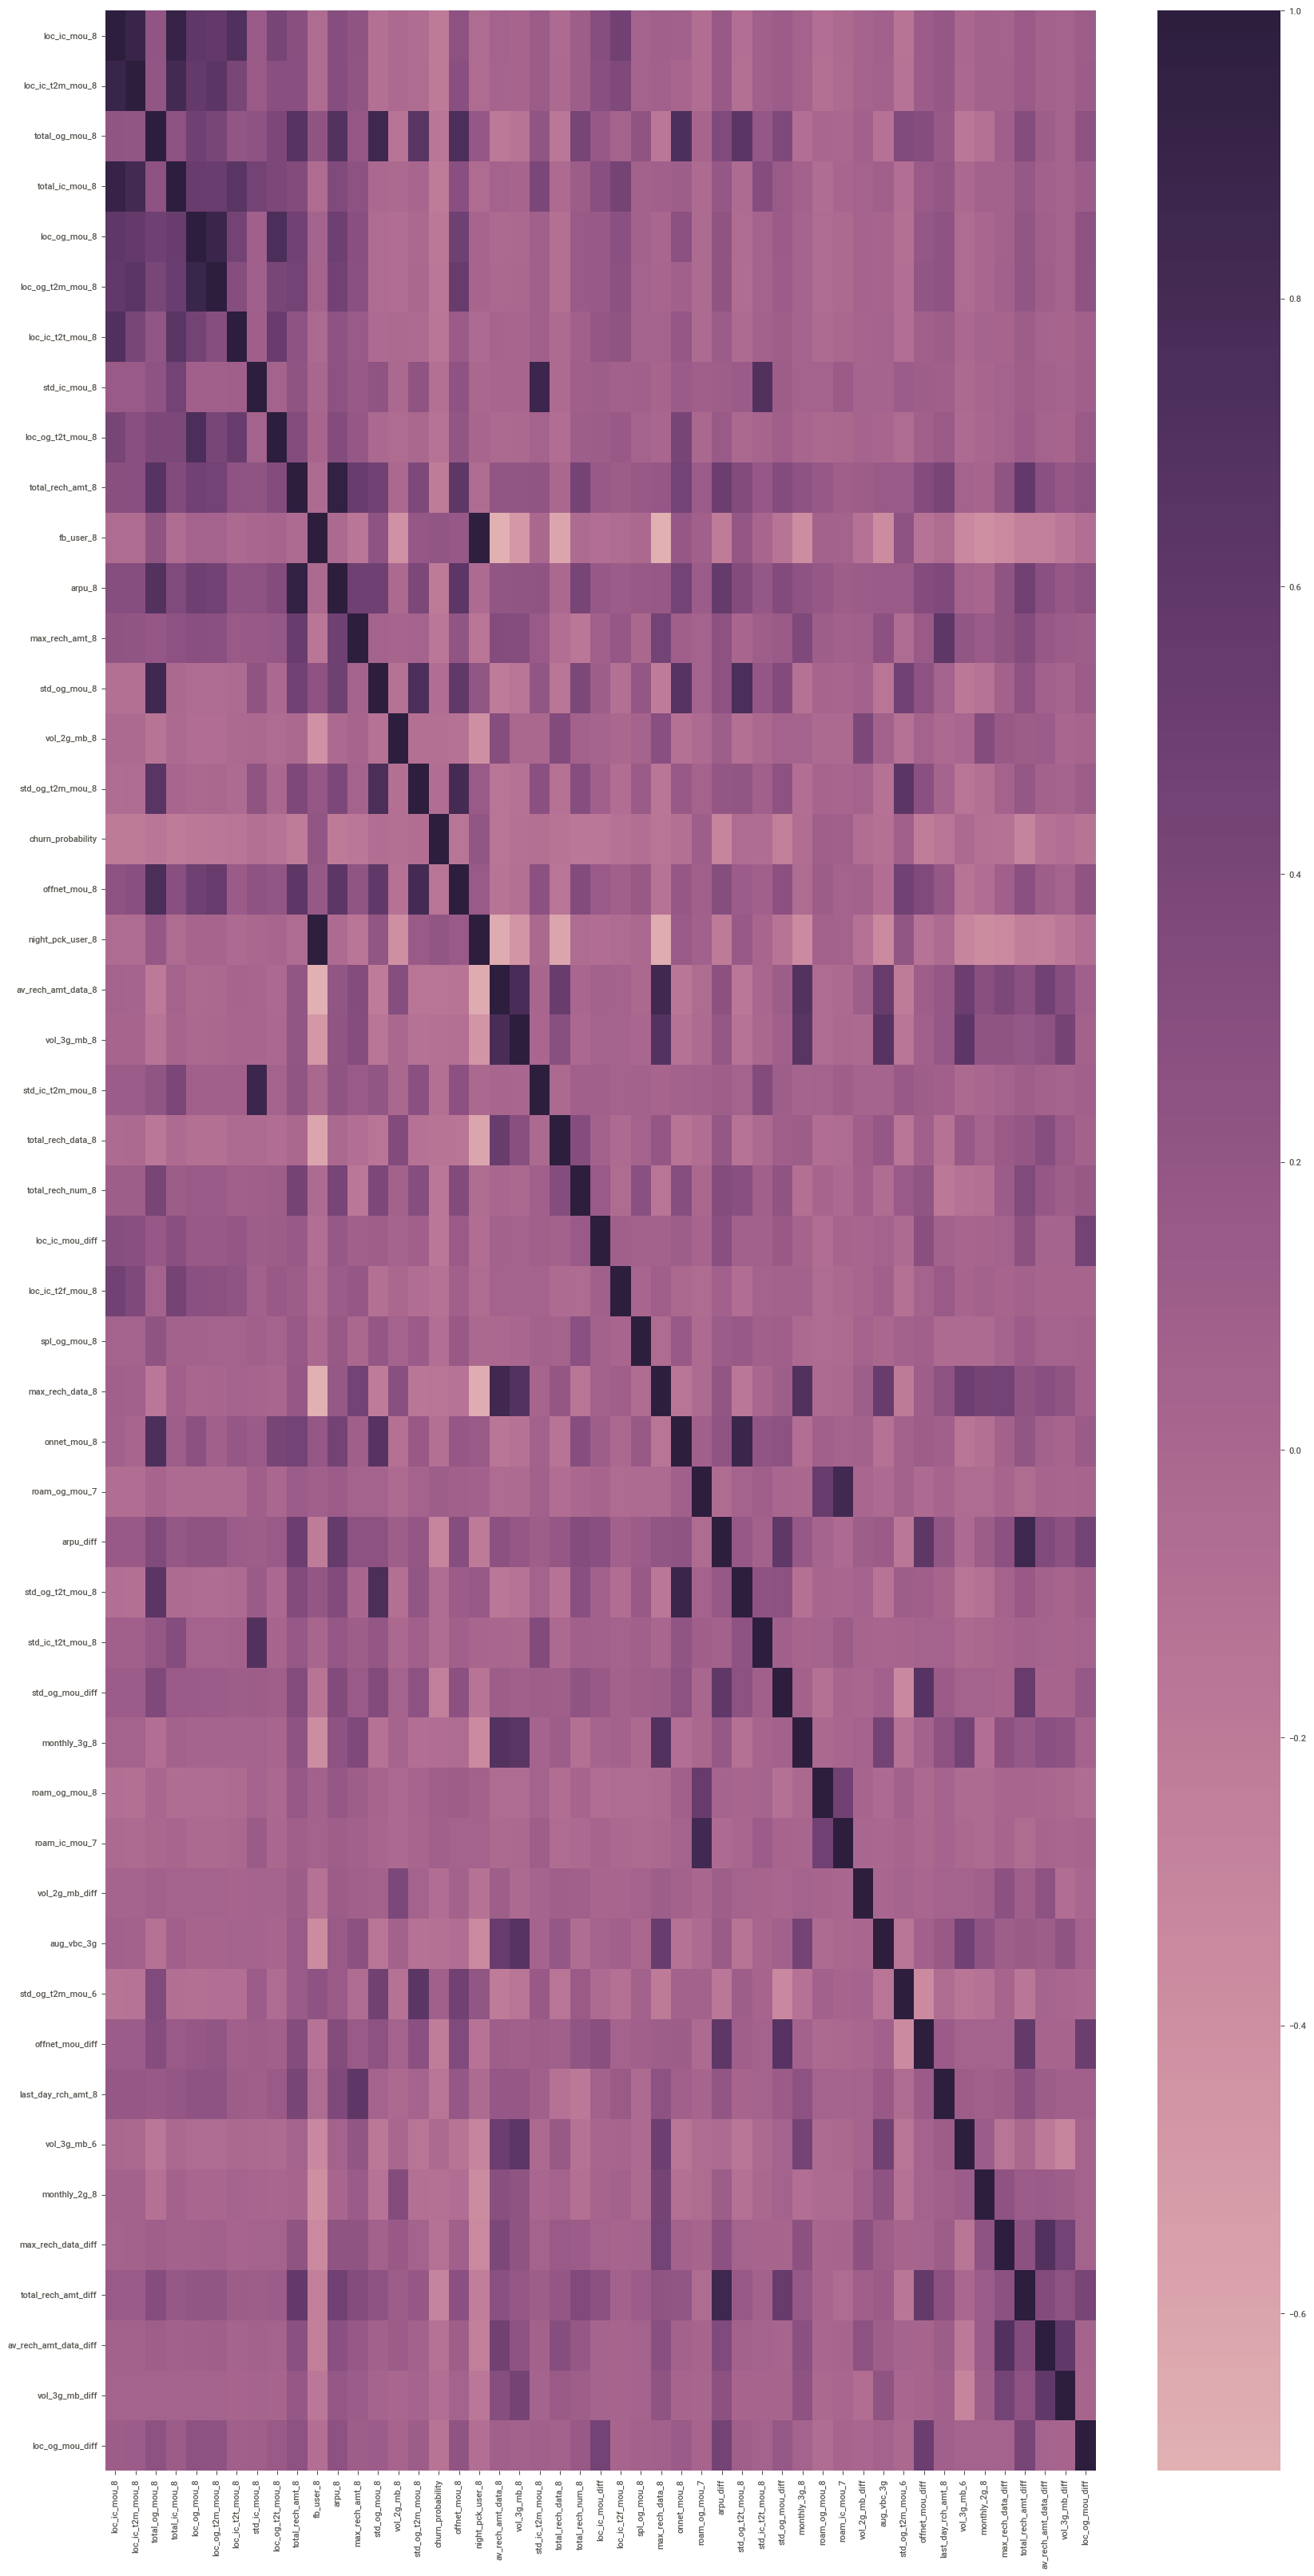

In [1590]:
# plot feature correlation
plt.figure(figsize = (20,40))
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0,cmap= sns.cubehelix_palette(200))
plt.show()

## Choosing best features

In [1591]:
# Selecting features that are relevent
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [1592]:
# logistic regression
step = [('scaler', StandardScaler()),("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))]

# compiling
logistic = Pipeline(step)

# hyperparameter
param = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# 5 folds
fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# creating gridsearch
model = GridSearchCV(estimator = logistic, cv = fold, param_grid = param, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

In [1593]:
# fitting the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [1594]:
# best hyperparameters score
model.best_score_

0.9970280933772964

In [1595]:
# best hyperparameters
model.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2'}

In [1596]:
# predicting churn on test data
y_pred = model.predict(X_test)

# creating onfusion matrix
print(confusion_matrix(y_test, y_pred))

# checking sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# checking area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4857  113]
 [   0  280]]
Sensitivity: 	1.0
Specificity: 	0.98
ROC:    	 1.0


### Extract the intercept and the coefficients from the logistic model 

In [1597]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [1598]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [1599]:
# coefficients
coefficient = logistic_model.coef_.reshape((9, 1)).tolist()
coefficient = [val for sublist in coefficient for val in sublist]
coefficient = [round(coefficient, 3) for coefficient in coefficient]
logistic_feature = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_feature)

In [1600]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,total_rech_amt_diff,total_og_mou_8,arpu_8,roam_ic_mou_8,roam_og_mou_8,std_ic_mou_8,av_rech_amt_data_8,std_og_mou_8
0,-37.060055,-16.690274,-0.507643,-12.110706,-0.335989,0.009356,0.307691,-6.880874,-8.298717,-6.152001


## Main indicator of churn
From above it is clear that the factors affecting the churn are total_ic_mou_8 (Total incoming call: Minutes of usage in the action phase), total_rech_amt_diff (Total recharge amount difference), total_og_mou_8 (Total outgoing call: Minutes of usage in the action phase), arpu (Average revenue per user), roam_ic_mou_8 (Roaming incoming call: Minutes of usage in the action phase), roam_og_mou_8 (Roaming outgoing call: Minutes of usage in the action phase), std_ic_mou_8(STD incoming call: Minutes of usage in the action phase), std_og_mou_8 (STD outgoing call: Minutes of usage in the action phase), av_rech_amt_data_8(average recharge amount in the action phase).

### Steps to help reduce churn
- <br> Give special; discounts to customers according to their usage
- <br> Provide additional internet services on recharge.
- <br> Speak to customers to fulfil their desires.
- <br> Lower tariffs on data usage,a better 2G area coverage where 3G is not available.
- <br> Expansion of 3G network where 3G is currently not available.

# Analysing on "test.csv" - EDA

In [1601]:
# Reading the data
test_df = pd.read_csv("C:\\Users\\91903\\Downloads\\telecom_churn_data\\test.csv\\test.csv")

In [1602]:
#To get the idea of how the table looks like we can use .head() or .tail() command
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [1603]:
test_df.shape

(30000, 171)

In [1604]:
#To get an idea of the numeric values, use .describe()
test_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


In [1605]:
# The .info() code gives almost the entire information that needs to be inspected
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [1606]:
# Creating column name list by types of columns
id_cols = ['circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
num_cols = [column for column in test_df.columns if column not in id_cols + date_cols + cat_cols]

In [1607]:
# The number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

#ID cols: 1
#Date cols:9
#Numeric cols:155
#Category cols:6


In [1608]:
# checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == test_df.shape[1])

True


In [1609]:
# looking for missing values
(test_df.isnull().sum()*100/test_df.shape[0]).sort_values(ascending=False)

arpu_3g_6             74.716667
count_rech_3g_6       74.716667
fb_user_6             74.716667
night_pck_user_6      74.716667
total_rech_data_6     74.716667
                        ...    
last_day_rch_amt_8     0.000000
vol_2g_mb_6            0.000000
vol_2g_mb_7            0.000000
vol_2g_mb_8            0.000000
jun_vbc_3g             0.000000
Length: 171, dtype: float64

In [1610]:
# 1 is the min value for recharge column
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

test_df[recharge_cols].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000,7585.000000,7706.000000,7922.000000
mean,2.454977,2.634960,2.650972,1.863151,2.017778,2.016915,0.591826,0.617181,0.634057,126.146473,127.488451,126.513254,192.068004,199.880903,199.178710
std,2.776552,2.932158,3.013204,2.579382,2.693674,2.701347,1.263132,1.378931,1.339962,106.428898,110.474812,108.948608,197.264397,193.146529,189.006928
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,82.000000,92.000000,91.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,154.000000,177.000000,179.000000,252.000000,252.000000,252.000000
max,55.000000,44.000000,57.000000,39.000000,31.000000,34.000000,28.000000,35.000000,30.000000,1555.000000,1555.000000,1555.000000,7546.000000,3765.000000,2520.000000


In [1611]:
# we observe from above that there are 3 set of values for

#total recharge amount,
#maximum recharge amount and
#average recharge amount for data.
#total recharge for data
#maximum recharge for data

In [1612]:
# the customer didn't recharge because the recharge date and the recharge value are missing
  
test_df.loc[test_df.total_rech_data_7.isnull() & test_df.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [1613]:
# let's check if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# check how many av_rech_amt_data_6 is NA
is_invalid_data_6 = test_df['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = test_df['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = test_df['av_rech_amt_data_7'] == np.nan

# check if any value is present for these rows for total_rech_data
print(test_df.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(test_df.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(test_df.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# check how many total_rech_data_6 is NA
is_invalid_data_6 = test_df['total_rech_data_6'] == np.nan 
is_invalid_data_7 = test_df['total_rech_data_7'] == np.nan 
is_invalid_data_8 = test_df['total_rech_data_8'] == np.nan 

# check if any value is present for these rows for av_rech_amt_data_6
print(test_df.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(test_df.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(test_df.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


In [1614]:
#We see from above the values are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.

In [1615]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
       ]

In [1616]:
# Now impute missing values with 0
test_df[zero_impute_rch] = test_df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [1617]:
print(test_df[zero_impute_rch].isnull().sum()*100/test_df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [1618]:
#  unique values in each column
test_df.nunique().sort_values(ascending=False)

id                  30000
arpu_6              27493
arpu_7              27406
arpu_8              26871
total_og_mou_7      19141
                    ...  
std_og_t2c_mou_8        1
circle_id               1
std_ic_t2o_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_8        1
Length: 171, dtype: int64

In [1619]:
# Dropping the columns 
test_df = test_df.drop(id_cols + date_cols, axis=1)
test_df.shape

(30000, 161)

In [1620]:
# replace missing values with '-1' in categorical columns
test_df[cat_cols] = test_df[cat_cols].apply(lambda x: x.fillna(-1))

In [1621]:
# Verifying the data
print("Missing value ratio:\n")
print(test_df[cat_cols].isnull().sum()*100/test_df.shape[0])

Missing value ratio:

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [1622]:
#Drop variables with more than a given threshold of missing values

initial_cols1 = test_df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols1 = list(test_df.apply(lambda column: True if column.isnull().sum()/test_df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':test_df.columns , 'include': include_cols1})
drop_missing.loc[drop_missing.include == True,:]

,features,include
0,id,True
1,loc_og_t2o_mou,True
2,std_og_t2o_mou,True
3,loc_ic_t2o_mou,True
4,arpu_6,True
...,...,...
156,fb_user_8,True
157,aon,True
158,aug_vbc_3g,True
159,jul_vbc_3g,True


In [1623]:
# drop columns
test_df = test_df.loc[:, include_cols1]

dropped_cols1 = test_df.shape[1] - initial_cols1
print("{0} columns dropped.".format(dropped_cols1))

-12 columns dropped.


In [1624]:
# imputing the respective null columns as 0. 
test_df[test_df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = test_df[test_df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [1625]:
test_df.describe()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,30000.0,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,0.0,0.0,0.0,282.644348,279.355021,279.845167,125.539490,127.946958,125.679297,...,0.073467,0.077967,0.082200,-0.517100,-0.510167,-0.500400,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,314.560212,323.205370,326.437029,286.076687,298.064169,294.988494,...,0.557327,0.613596,0.611546,0.842535,0.846081,0.849171,960.109844,263.460641,278.749349,246.098292
min,69999.000000,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,0.0,0.0,0.0,92.907500,87.504750,84.180500,5.410000,4.790000,4.047500,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,0.0,0.0,0.0,198.227500,191.775000,191.690500,31.400000,29.410000,28.480000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,0.0,0.0,0.0,371.969250,365.250750,367.804750,111.517500,108.845000,108.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,6723.790000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


In [1626]:
# Selecting features that are relevent
test_df['total_rech_amt_diff'] = test_df.total_rech_amt_8 - ((test_df.total_rech_amt_6 + test_df.total_rech_amt_7)/2)
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
print(test_df[top_features])

test_df_test = test_df[top_features]

       total_ic_mou_8  total_rech_amt_diff  total_og_mou_8   arpu_8  \
0               36.26                -36.5           57.94   64.445   
1              281.66                  0.0          415.59  360.868   
2                0.00                250.0            0.00  746.239   
3              549.13               -185.0           24.01   24.400   
4              159.26                123.0          779.78  413.329   
...               ...                  ...             ...      ...   
29995          663.88               -174.0          507.38  406.150   
29996           81.93                188.5          840.03  374.981   
29997           20.36                165.0           49.64  180.194   
29998            9.26               -774.0          332.63  257.439   
29999          261.64               -440.0          218.11  605.320   

       roam_ic_mou_8  roam_og_mou_8  std_ic_mou_8  av_rech_amt_data_8  \
0               0.00           0.00          4.34                 0.0   
1

In [1627]:
# predicting churn on test data
y_pred_1 = model.predict(test_df_test)



# Creating submission file

In [1628]:
# Reading the data
sample = pd.read_csv("C:\\Users\\91903\\Downloads\\telecom_churn_data\\sample_2.csv")

In [1629]:
sample.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [1635]:
# Reading the data
test_df_2 = pd.read_csv("C:\\Users\\91903\\Downloads\\telecom_churn_data\\test.csv\\test.csv")

In [1636]:
test_df_2.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [1637]:
submission_data = test_df_2.set_index('id')[top_features_1]
submission_data.shape

(30000, 8)

In [1641]:

test_df_2['churn_probability'] = y_pred_1
output = test_df_2[['id','churn_probability']]
output.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [1642]:
output.to_csv('C:\\Users\\91903\\Downloads\\telecom_churn_data\\Submission.csv',index=False)